# Customer Churn Analysis
## Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
pd.set_option("display.max_columns",None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Here we have imported the dataset using pd.red_csv and set the option to display all the columns present in the dataset.

The dataset contains the details of customers in which both numerical and categorical data are present. Here "Churn" is the target variable which contains 2 categories so it will be termed as "Classification problem" where we need to predict the several customer churn using the classification models.

## Exploratory Data Analysis (EDA)

In [3]:
df.shape

(7043, 21)

The dataset contains 7043 rows and 21 columns. Out of 21 columns 20 are independent variables and remaining one is the dependent variable which is our target column.

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Checking null values in the dataframe
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in any of the columns.

In [6]:
# Checking the type of dataset
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are three different types of data present in the dataset. There is 1 column with float data type, 2 columns with integer data type and 18 columns with object data types.

In [7]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('*'*50)

6688-UZPWD    1
0187-QSXOE    1
6128-AQBMT    1
3318-OSATS    1
5153-RTHKF    1
             ..
2758-RNWXS    1
2595-KIWPV    1
7703-ZEKEF    1
9153-BTBVV    1
2867-UIMSS    1
Name: customerID, Length: 7043, dtype: int64
**************************************************
Male      3555
Female    3488
Name: gender, dtype: int64
**************************************************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
**************************************************
No     3641
Yes    3402
Name: Partner, dtype: int64
**************************************************
No     4933
Yes    2110
Name: Dependents, dtype: int64
**************************************************
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**************************************************
Yes    6361
No      682
Name: PhoneService, dtype: int64
*************************************************

In [8]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

We can observe that the "TotalCharges" has continuous data but when we checked the data type its showing object data type due to some reason also if we notice the value counts, 11 rows of this column has blank data. Let's handle this column.

In [9]:
# Checking the space in TotalCharges column
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


By locating the TotalCharges we can find this column has space as values but it was showing 0 missing values in this columns. Let's fill this column by some values and then we will convert this into float type.

In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"].value_counts()

20.2      11
19.75      9
19.65      8
19.9       8
20.05      8
          ..
8312.4     1
639.45     1
178.85     1
493.95     1
74.25      1
Name: TotalCharges, Length: 6530, dtype: int64

Since we saw 11 rows with blank spaces in TotalCharges column, here we have replaced them with nan values. Also checked the values counts for the same column.

In [11]:
# Converting object data type to float data type
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

Since the column TotalCharges had all float numbers in the dataset but due to some reason it showed as object data type. For this reason we have converted it into float data type.

In [12]:
# Let's check the null values again
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Since we have flled the blank spaces in TotalCharges column with nan values, it's showing 11 null values in that column. Replacing the NAN values usng mean method as the column TotalCharges is continuous in nature. Let's handle this column.

In [13]:
# Checking the mean of TotalCharges column
print("The mean value of TotalCharges is:",df["TotalCharges"].mean())

The mean value of TotalCharges is: 2283.3004408418697


In [14]:
# Filling null values in TotalCharges with its mean 
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

Here we have checked the mean value of TotalCharges column and replaced the missing values with its mean.

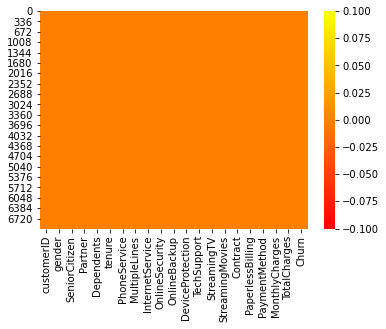

In [15]:
# Let's check the null values again
sns.heatmap(df.isnull(),cmap="autumn")
plt.show()

There are no missing values in any of the column.

In [16]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


By info method we can get the information about the dataset which includes indexing type, column type, non-null values and memory usage. Here we can see there are 3 types of data present, 2 integer data type, 2 float data type, and remaining 17 columns have object data type. We will use encoding methods to convert this object type data into numerical data in later part.

In [17]:
# Separating numerical and categorcal columns

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("\n")

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)

Categorical columns are:
 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical columns are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


We have separated the object data type columns and Numerical data type columns. Most of the columns have object data type, we will use encoding techniques to convert them into numerical in the later part.

In [18]:
# Checking number of unique values in each column
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


These are the unique values present in the dataset. Here CustomerID column has the data of unique ID given to the customers which is not required for the predictions.Let's drop this column.

In [19]:
# Dropping CustomerID column
df.drop("customerID",axis=1,inplace=True)

In [20]:
# Checking the list of counts of target
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

There are two categories present in the target column. Namely "No" and "Yes".

In [21]:
# Checking the unique values in target column
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

There are two categories in the column Churn namely No and Yes. We can assume that "No" stands for the customers who have not churned and "Yes" stands for the customers who have got churned from the company.

## Description of Dataset

In [22]:
# Statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


This gives the statistical information of the numerical columns. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.

- The counts of all the 3 columns are same which means there are no missing values in the dataset.
- The mean value is greater than the median(50%) in tenure and TotaCharges columns which means the data is skewed to right in these columns.
- The data in the column MonthlyCharges have mean value less than median that means the data is skewed to left.
- By summarising the data we can observe there is huge difference between 75% and max hence there are outliers present in the data which we will remove them later on using appropriate methods.
- We can also notice the Standard deviation, min, 25% percentile values from this describe method.

## Data Visualization
## Univariate Analysis
## Plotting categorical columns

No     5174
Yes    1869
Name: Churn, dtype: int64


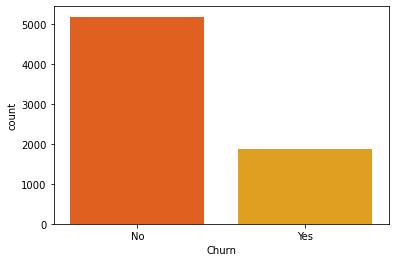

In [23]:
#Visualize the number of churned customers 
print(df["Churn"].value_counts())
sns.countplot(df["Churn"],palette="autumn")
plt.show()

From the count plot we can observe that the count of "No Churn" are high compared to the count of "Yes Churn". That is there are more number of customers who have not churned. This leads to class imbalance issue in the data, we will rectify it by using oversampling method in later part.

Male      3555
Female    3488
Name: gender, dtype: int64


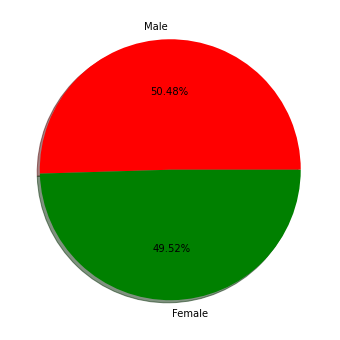

In [24]:
#Visualize the count of Gender
print(df['gender'].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(6,6))
colors=["r","g"]
ax.pie(df['gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

From the plot we can observe the total number of male and female customers are almost same, but still the count of male is 3555 which is high compared to count of female which has 3488 counts.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


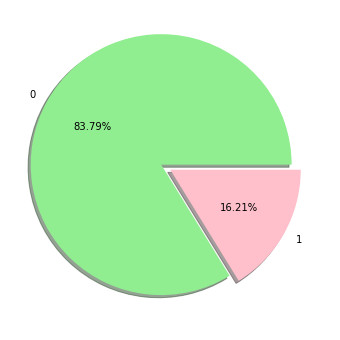

In [25]:
#Visualize the count of Gender
print(df['SeniorCitizen'].value_counts())
labels='0','1'
fig, ax = plt.subplots(figsize=(6,6))
colors=["lightgreen","pink"]
ax.pie(df['SeniorCitizen'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,explode=(0.08,0),colors=colors)
plt.show()

Here 0 represents the non senoir citizens and 1 represents the senior citizens. The count of 0 is high in data compared to 1 which means the number non seniorcitizens are quite high compared to senior citizens data in the given dataset. Around 83% of the customers are non senior citizens and only 16% are senior citizens.

No     3641
Yes    3402
Name: Partner, dtype: int64


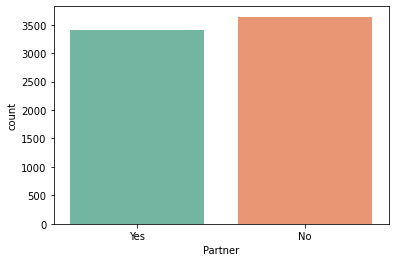

In [26]:
#Visualizing how many customers have their partners
print(df["Partner"].value_counts())
sns.countplot(df["Partner"],palette="Set2")
plt.show()

The count for partner details are almost similar and the customers who do not have partners are bit higher than who have partners.

No     4933
Yes    2110
Name: Dependents, dtype: int64


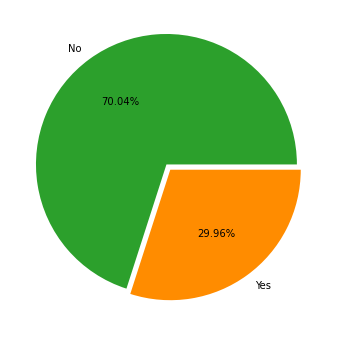

In [27]:
#Visualize the count of Gender
print(df['Dependents'].value_counts())
labels='No','Yes'
fig, ax = plt.subplots(figsize=(6,6))
colors=["tab:green","darkorange"]
ax.pie(df['Dependents'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,explode=(0.05,0),colors=colors)
plt.show()

The customers who have dependents are very less in counts that means they do not have anyone dependent on them. Here around 70% of customers have dependents only 29.96% have no dependents.

Yes    6361
No      682
Name: PhoneService, dtype: int64


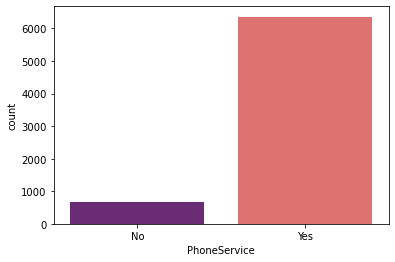

In [28]:
#Visualizing how many customers have Phone Service
print(df["PhoneService"].value_counts())
sns.countplot(df["PhoneService"],palette="magma")
plt.show()

The customers who have phone services are large in numbers and who do not own phone services are very less in number

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


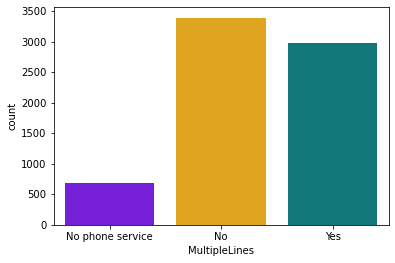

In [29]:
#Visualizing count of multiple lines
print(df["MultipleLines"].value_counts())
sns.countplot(df["MultipleLines"],palette="prism_r")
plt.show()

The customers who have phone services from single line have high counts compared to the customers having phone services from multiple lines, also the customers who do not have phone services have covered very less data compared to others.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


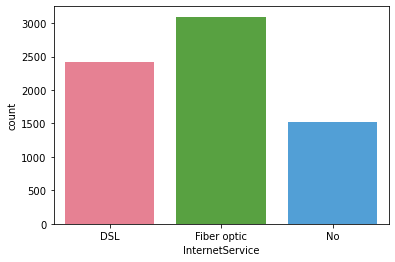

In [30]:
#Visualizing how many customers have Internet services
print(df["InternetService"].value_counts())
sns.countplot(df["InternetService"],palette="husl")
plt.show()

Most of the customers have chosen to get Fiber optic internet followed by DSL, but there are many customers who do not get an internet service.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


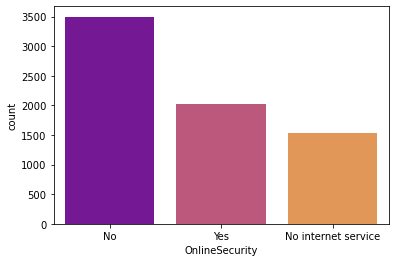

In [31]:
#Visualizing how many customers have OnlineSecurity
print(df["OnlineSecurity"].value_counts())
sns.countplot(df["OnlineSecurity"],palette="plasma")
plt.show()

It is obvious that the customers who have internet services they needs online security and who do not own any internet services, they do not need any online security. But from the count plot we can observe the majority of customers who have internet services but they do not use any online security.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


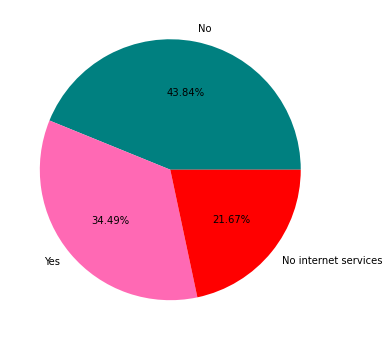

In [32]:
#Visualizing how many customers have Online backup
print(df['OnlineBackup'].value_counts())
labels='No','Yes',"No internet services"
fig, ax = plt.subplots(figsize=(6,6))
colors=["teal","hotpink","r"]
ax.pie(df['OnlineBackup'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,colors=colors)
plt.show()

It is obious that the customers who do not own internet services and online security, they do not need online backup usage. From the plot we can see the majority of customers who own internet services they do not have Online backup and the customers who own internet services have very less online backup. Also the customers who do not have internet services have very less online backup counts compared tp others.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


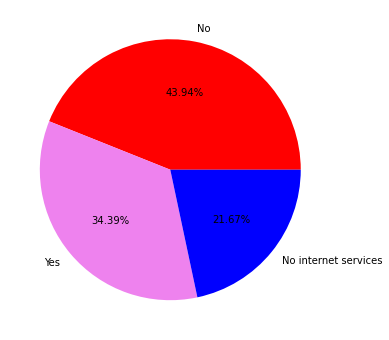

In [33]:
#Visualizing how many customers have DeviceProtection 
print(df['DeviceProtection'].value_counts())
labels='No','Yes',"No internet services"
fig, ax = plt.subplots(figsize=(6,6))
colors=["r","violet","b"]
ax.pie(df['DeviceProtection'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,colors=colors)
plt.show()

From the count plot we can notice that the customers without any device protection have high counts as compared to the customers who have some kind of device protection. And the customers who do not have internet access they do not need any device protection.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


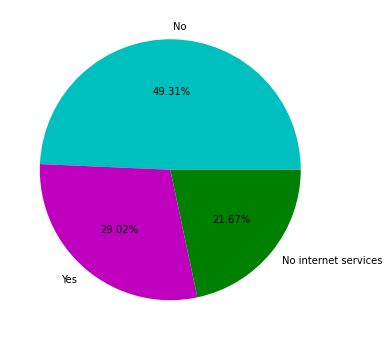

In [34]:
#Visualizing how many customers have TechSupport
print(df['TechSupport'].value_counts())
labels='No','Yes',"No internet services"
fig, ax = plt.subplots(figsize=(6,6))
colors=["c","m","g"]
ax.pie(df['TechSupport'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,colors=colors)
plt.show()


The customers who do not need any technical support are high in counts compared to the customers who need technical support. Around 49% of the people do not need any technical support and only 29% needs.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


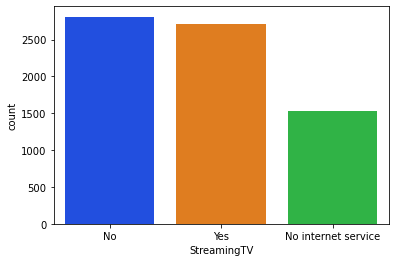

In [35]:
#Visualizing how many customers have StreamingTV
print(df["StreamingTV"].value_counts())
sns.countplot(df["StreamingTV"],palette="bright")
plt.show()

The customers who do not use streamin TV have little bit high in numbers than the customers who do use Streaming TV. And the customers who do not own internet they do not have this service much.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


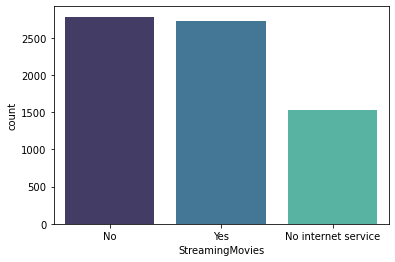

In [36]:
#Visualizing how many customers have StreamingMovies
print(df["StreamingMovies"].value_counts())
sns.countplot(df["StreamingMovies"],palette="mako")
plt.show()

The customers who do not have Streaming movies are high in count followed by the customers who have Streaming movies services. And the customers who do not have internet services, they have less streaming movies services compared to others.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


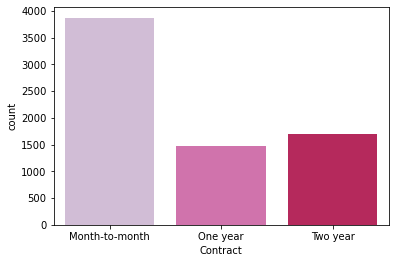

In [37]:
#Visualizing how many customers have Contract
print(df["Contract"].value_counts())
sns.countplot(df["Contract"],palette="PuRd")
plt.show()

Most of the customers prefer Month to Month contract compared to 1 year and 2 years contract.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


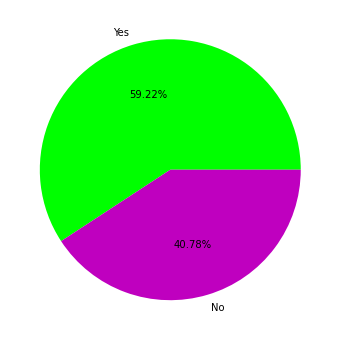

In [38]:
#Visualizing how many customers have PaymentMethod
print(df['PaperlessBilling'].value_counts())
labels='Yes',"No"
fig, ax = plt.subplots(figsize=(6,6))
colors=["lime","m"]
ax.pie(df['PaperlessBilling'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,colors=colors)
plt.show()

Most of the customers prefer paperless billing and average number of customers who do not prefer paper less billing, they may like to receive paper billing.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


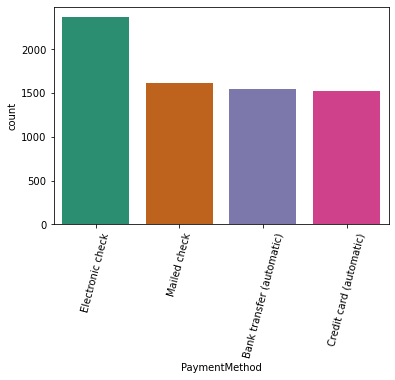

In [39]:
#Visualizing how many customers have Contract
print(df["PaymentMethod"].value_counts())
sns.countplot(df["PaymentMethod"],palette="Dark2")
plt.xticks(rotation=75)
plt.show()

Most of the customers prefer Electronic check payment method and the customers who prefer Mailed Check, bank transfer and Credit card have average in count.

## Plotting numerical columns

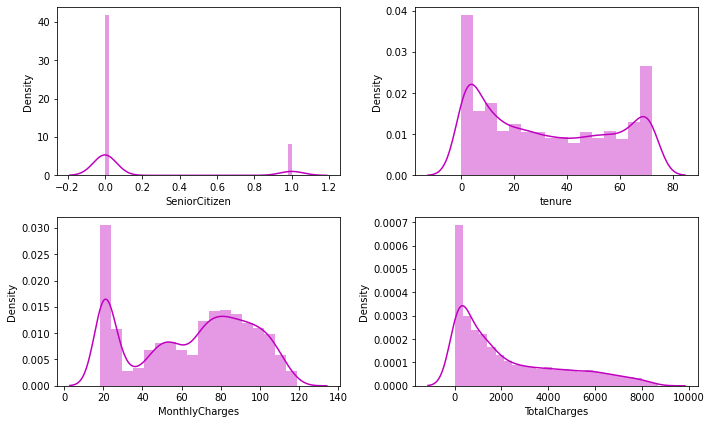

In [40]:
# Let's check how the data has been distributed in remaining columns

plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots we can notice that the data almost looks normal in all the columns except SeniorCitizen. And the data in the column TotalCharges is skewed to right. Other two columns tenure and MonthlyCharges do not have skewness

## Bivariate Analysis

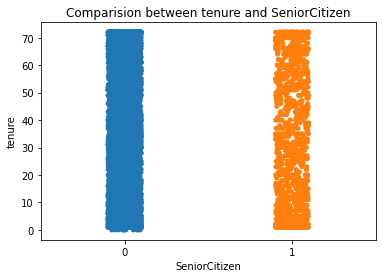

In [41]:
#Comparing tenure and SeniorCitizen 
plt.title("Comparision between tenure and SeniorCitizen")
sns.stripplot( x = "SeniorCitizen",y = "tenure", data = df)
plt.show()

There is no significant difference between the features, here both the feature are in equal length.

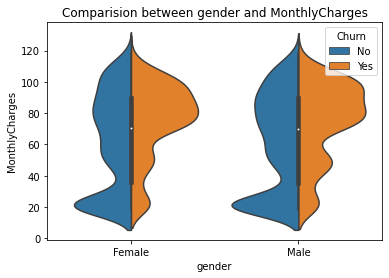

In [42]:
#Comparing gender and MonthlyCharges 
plt.title("Comparision between gender and MonthlyCharges")
sns.violinplot( x = "gender",y = "MonthlyCharges", data = df,hue="Churn",split=True)
plt.show()

Most both male and female customers with monthly charges above 60 have high chances of getting churned.

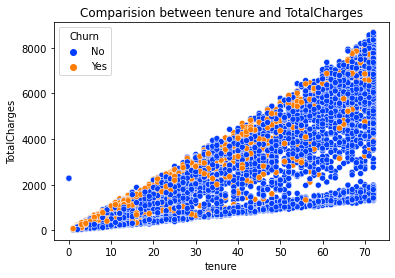

In [43]:
#Comparing tenure and TotalCharges 
plt.title("Comparision between tenure and TotalCharges")
sns.scatterplot( x = "tenure",y = "TotalCharges", data = df,hue="Churn",palette="bright")
plt.show()

Here we can notice the strong linear relation between the features.
As the tenure increases, TotalCharges also increases rapidly. If the customers have low tenure services then there is high chance of churn.

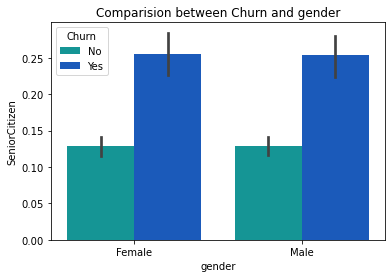

In [44]:
#Comparing gender and SeniorCitizen on the basis of churn
plt.title("Comparision between Churn and gender")
sns.barplot( x = "gender",y = "SeniorCitizen", data = df,palette="winter_r",hue="Churn")
plt.show()

There is no significant difference between the columns. The customer's churns remains unaffected in gender and SeniorCitizen case.

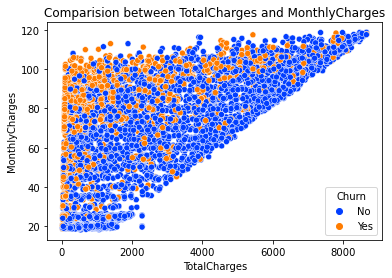

In [45]:
#Comparing TotalCharges and MonthlyCharges 
plt.title("Comparision between TotalCharges and MonthlyCharges")
sns.scatterplot( x = "TotalCharges",y = "MonthlyCharges", data = df,hue="Churn",palette="bright")
plt.show()

There is a linear relation between the features. The customers with high monthly charges have high tendancy to stop the services since they have high total charges.
Also the if the customers ready to contribute with the monthly charges then there is an increment in the total charges.

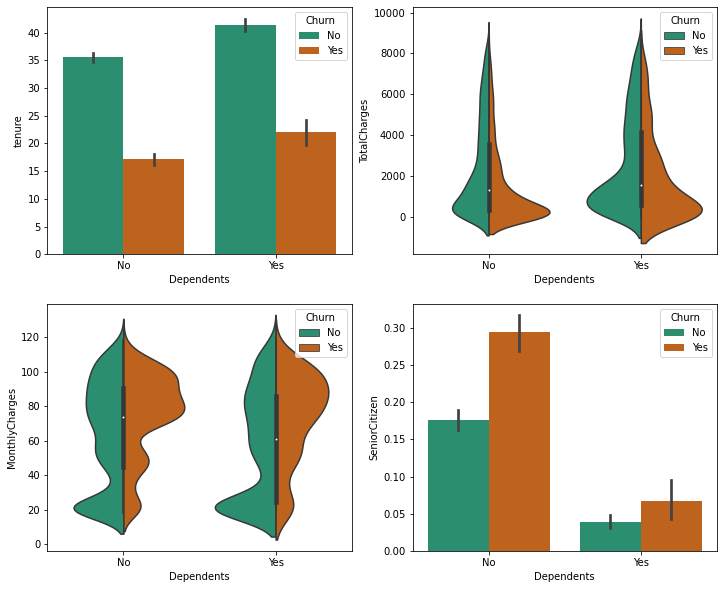

In [46]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Churn level in tenure
sns.barplot(x='Dependents',y='tenure',ax=axes[0,0],data=df,palette="Dark2",hue="Churn")

# Checking Churn level in TotalCharges
sns.violinplot(x='Dependents',y='TotalCharges',ax=axes[0,1],data=df,palette="Dark2",hue="Churn",split=True)

# Checking Churn level in MonthlyCharges
sns.violinplot(x='Dependents',y='MonthlyCharges',ax=axes[1,0],data=df,palette="Dark2",hue="Churn",split=True)

# Checking Churn level in SeniorCitizen
sns.barplot(x='Dependents',y='SeniorCitizen',ax=axes[1,1],data=df,palette="Dark2",hue="Churn")
plt.show()

- The customers who have dependents with high tenure, then the churned level is high80-110.
- The customers who have total charges in the range of 0-2000 with dependents then the chance of getting churned is high.
- The customers having Monthly charges between 80-110 with dependents have high churn rate and when the customers have no dependents and having monthly charges around 20 then teh ratio of churn is very high.
- If the customer is a senior citizen and have no dependents then there is a tendancy of grtting churned.

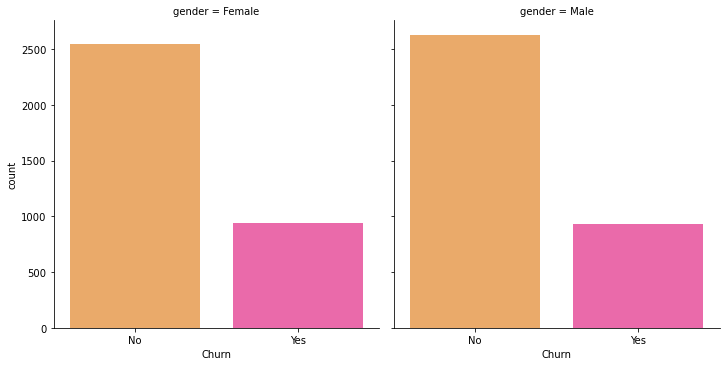

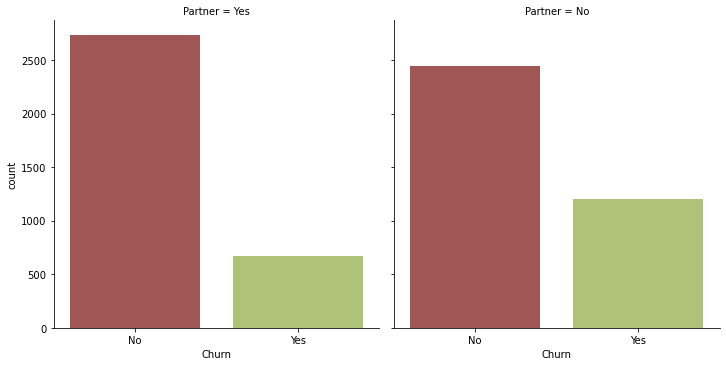

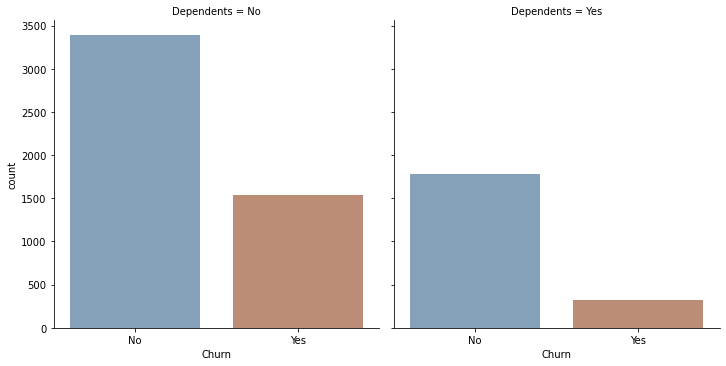

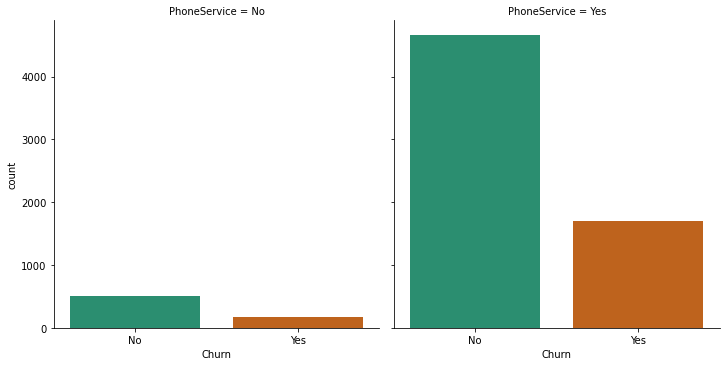

In [47]:
# Checking Churn level and gender
sns.catplot(x='Churn',col='gender',data=df,kind="count",palette="spring_r")

# Checking Churn level and Partner
sns.catplot(x='Churn',col='Partner',data=df,palette="tab20b_r",kind="count")

# Checking Churn level in Dependents
sns.catplot(x='Churn',col='Dependents',data=df,palette="twilight_shifted",kind="count")

# Checking Churn level in PhoneService
sns.catplot(x='Churn',col='PhoneService',data=df,palette="Dark2",kind="count")
plt.show()

- In the first plot we can see there is no significance difference in the genders, both the genders have equal churn level.
- In the second plot we can see the customers without partners have high churn rate compared to the customers with partners.
- The customers who do not have any dependency have high churn rate compared to the customers who have dependents.
- In the last plot we can notice the customers who have phone service have high tendency of getting churned.

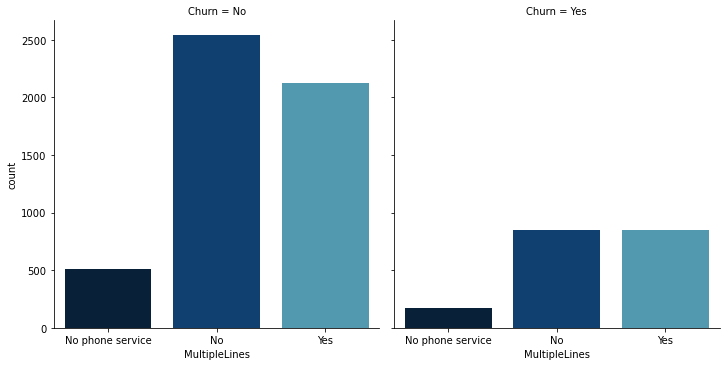

In [48]:
# Checking Churn level and MultipleLines
sns.catplot(x= 'MultipleLines',col='Churn',palette="ocean",kind="count",data=df)
plt.show()

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services.

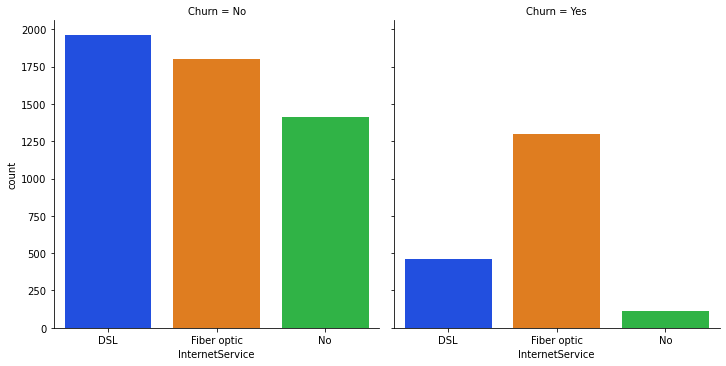

In [49]:
# Checking Churn level in InternetService
sns.catplot(x='InternetService',col='Churn',palette="bright",kind="count",data=df)
plt.show()

The ratio of churn is high when the customers prefer Fiber optic internet services compared to other services, may be this type of service is bad and and need to be focused on. And the customers who own DSL service they have very less churn rate.

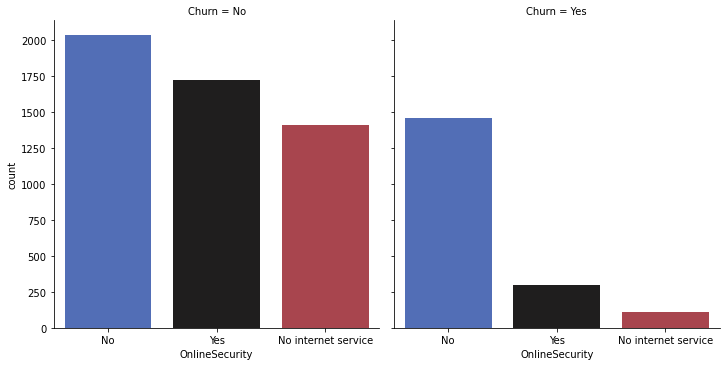

In [50]:
# Checking Churn level in OnlineSecurity
sns.catplot(x='OnlineSecurity',col='Churn',palette="icefire",kind="count",data=df)
plt.show()

The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency to getting churned.

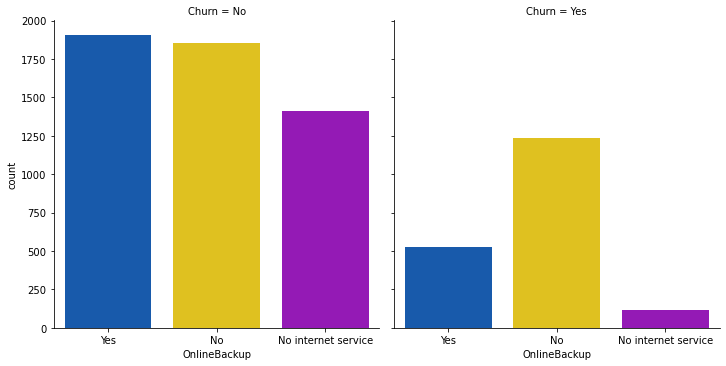

In [51]:
# Checking Churn level in OnlineBackup
sns.catplot(x='OnlineBackup',col='Churn',palette="prism",kind="count",data=df)
plt.show()

It is also same as in the case of online security. It is obvious that the customers having who do not have internet services they do not need any online backup. The customers who do not have online backup services they have high churn rate.

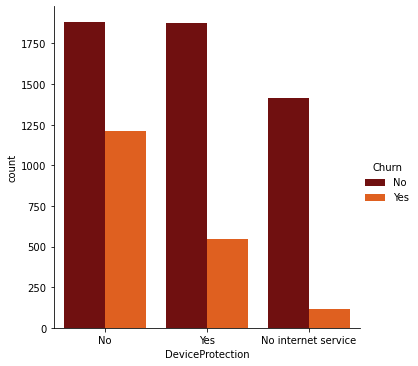

In [52]:
# Checking Churn level in DeviceProtecion
sns.catplot(x='DeviceProtection',hue='Churn',palette="gist_heat",kind="count",data=df)
plt.show()

The customers who do not own any Device protection have very high churn rate compared to others.

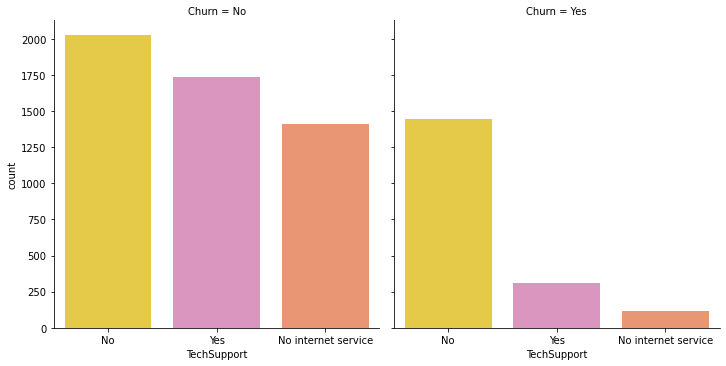

In [53]:
# Checking Churn level in TechSupport
sns.catplot(x='TechSupport',col='Churn',palette="Set2_r",kind="count",data=df)
plt.show()

Here we can clearly see that the customers who do not have any techsupport then they have high churn ratio.

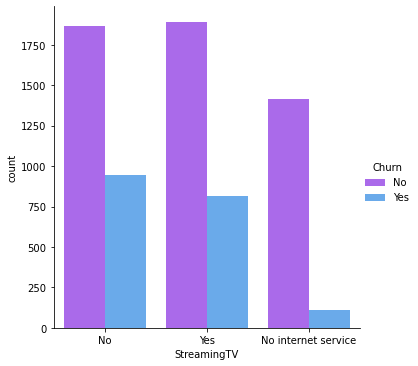

In [54]:
# Checking Churn level in StreamingTV
sns.catplot(x='StreamingTV',hue='Churn',palette="cool_r",kind="count",data=df)
plt.show()

The churn rate is nearly same if the customer own StreamingTV or not.

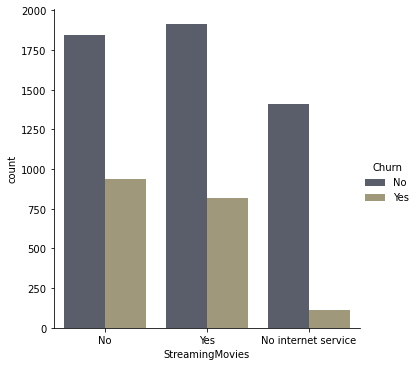

In [55]:
# Checking Churn level in StreamingMovies
sns.catplot(x='StreamingMovies',hue='Churn',palette="cividis",kind="count",data=df)
plt.show()

The customers who are existing in the company they do not own StreamingMovies in their devices. And the churn rate is low when the customer do not have internet services.

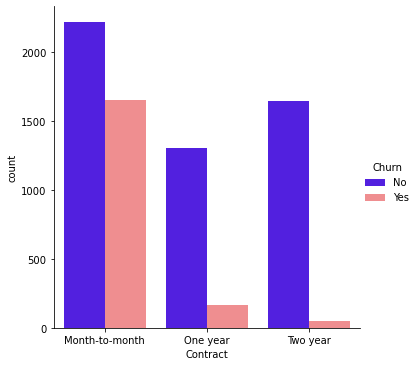

In [56]:
# Checking Churn level in Contract
sns.catplot(x='Contract',hue='Churn',palette="gnuplot2",kind="count",data=df)
plt.show()

The customers who have churned are mostly having month to month contract.

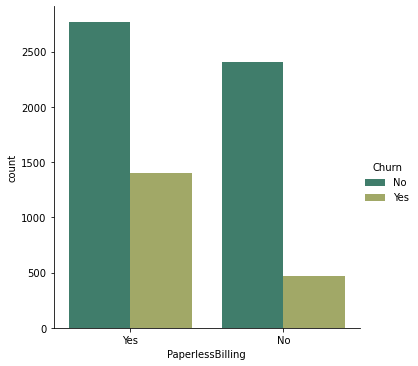

In [57]:
# Checking Churn level in PaperlessBilling
sns.catplot(x='PaperlessBilling',hue='Churn',palette="gist_earth",kind="count",data=df)
plt.show()

The customers who prefer paperless billing they have high churn rate.

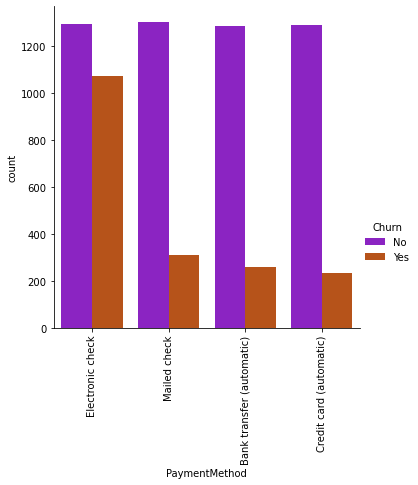

In [58]:
# Checking Churn level in PaymentMethod
sns.catplot(x='PaymentMethod',hue='Churn',palette="gnuplot",kind="count",data=df)
plt.xticks(rotation=90)
plt.show()

The customers who prefer Electronic check have high churn rate also the customers who existing in the company uses equal payment method.

## Multivariate Analysis

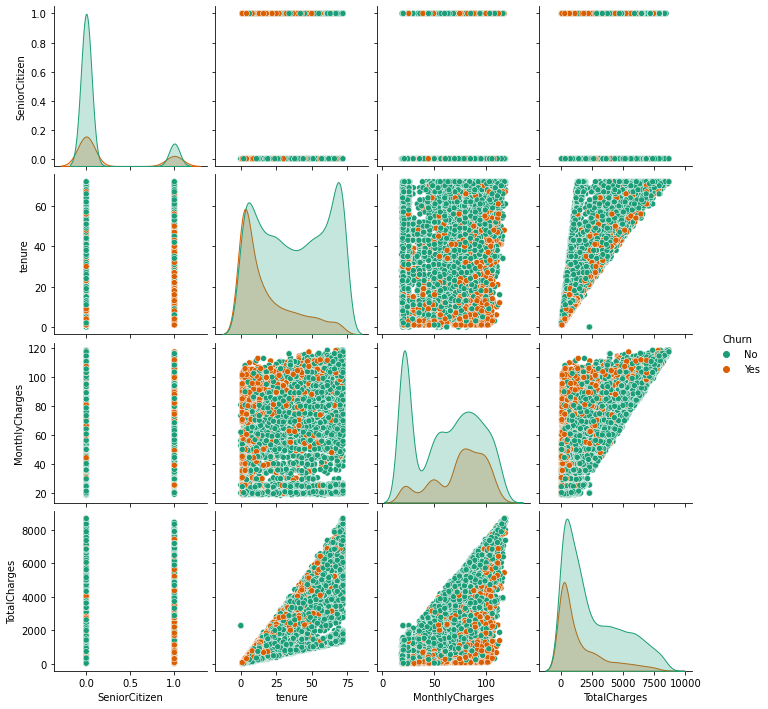

In [59]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

- The pairplot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the distribution plots.
- The features tenure and TotalCharges, Monthlycharges and TotalCharges have strong linear relation with each other.
- There are no outliers in any of the columns but let's plot box plot to identify the outliers.

## Identifying the outliers

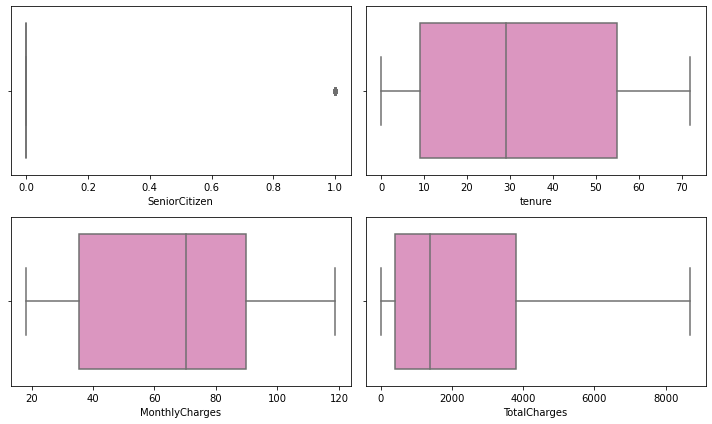

In [61]:
# Let's check the outliers by ploting box plot

plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],palette="Set2_r")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

The column Senior Citizen has outliers but it contains categorical data so no need to remove outliers. Apart from this none of the columns have outliers

## Checking for skewness

In [62]:
# Checking the skewness
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

The columns SeniorCitizen and TotalCharges have skewness in the data. Since SeniorCitizen is categorical no need to remove skewness but in TotalCharges. Since TotalCharges is continuous in nature, lets use cube root method to remove skewness.

## Removing skewness

In [63]:
# Removing skewness using square root method
df["TotalCharges"] = np.cbrt(df["TotalCharges"])

We have removed the skewness using cube root method.

In [64]:
# Checking skewness again
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

We can see the skewness has been reduced in TotalCharges column.

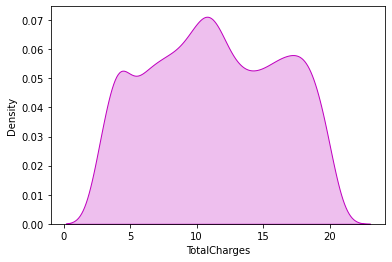

In [65]:
# Let's visualize how the data has been distributed in TotalCharges after removing skewness
sns.distplot(df["TotalCharges"],color="m",kde_kws={"shade": True},hist=False)
plt.show()

The looks almost normal and skewness is also removed.

## Encoding the categorical columns using Ordinal Encoding

In [66]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


In [67]:
# Statistical summary of numerical columns
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


After encoding the categorical column we are able to see all the columns details here. The counts of all the columns are same that means no null values in the dataset. This describe method descrbes the count, mean, standard deviation, min, IQR and max values of all the columns.

## Correlation between the target variable and independent variables using HEAT map

In [68]:
# Checking the correlation between features and the target
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


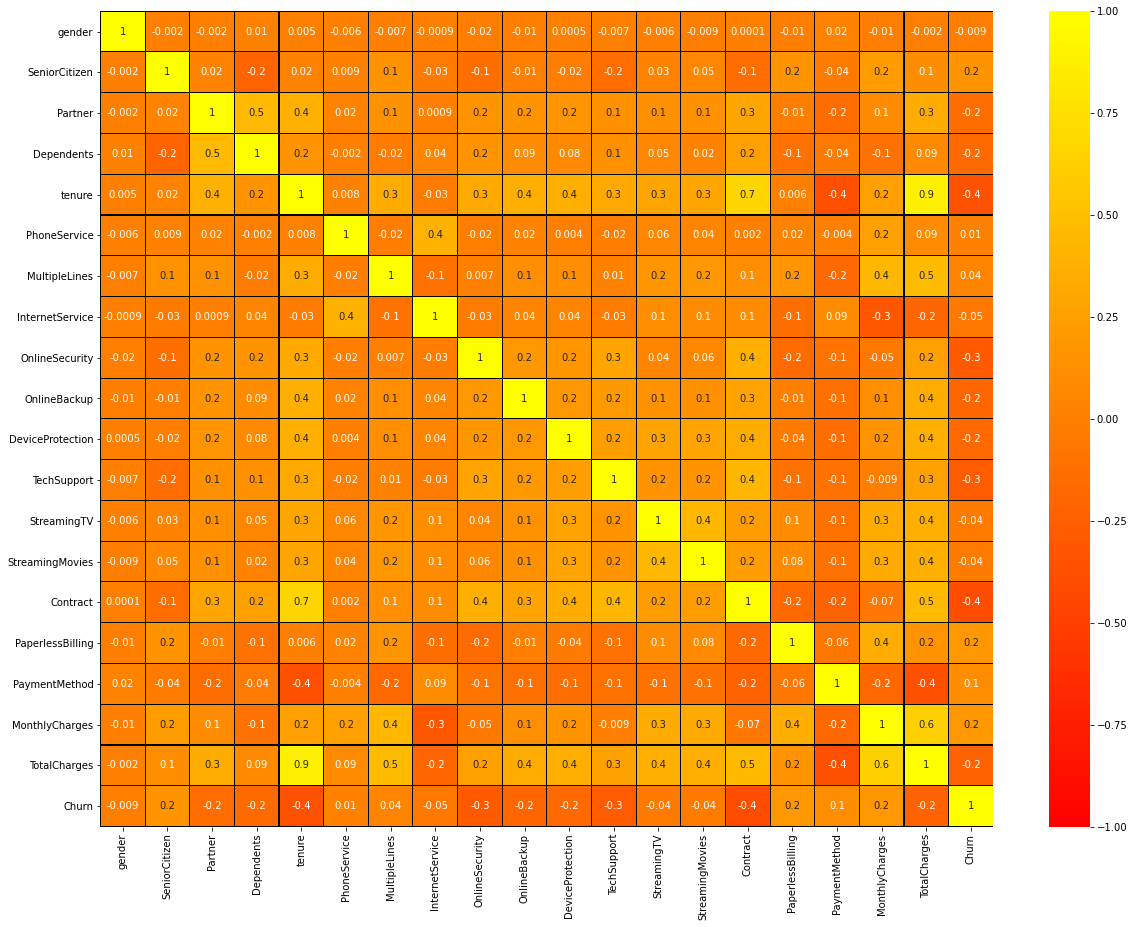

In [71]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="autumn")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

- There is no much positive correlation between the target and features.
- The columns MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive collrelation with the label Churn.
- The label is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.
- Also the column gender has very less correlation with the label, we can drop it if necessary.
- The columns TotalCharges and tenure, Contract and tenure, TotalCharges and MonthlyCharges and many other columns have high correlation with each other. This leads to multicolllinearity issue, to overcome with this problem we will check VIF values and then we will drop the columns having VIF above 10.

In [72]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

We can observe the positive and negative correlated features with the target here.

## Visualizing the correlation between label and features using bar plot

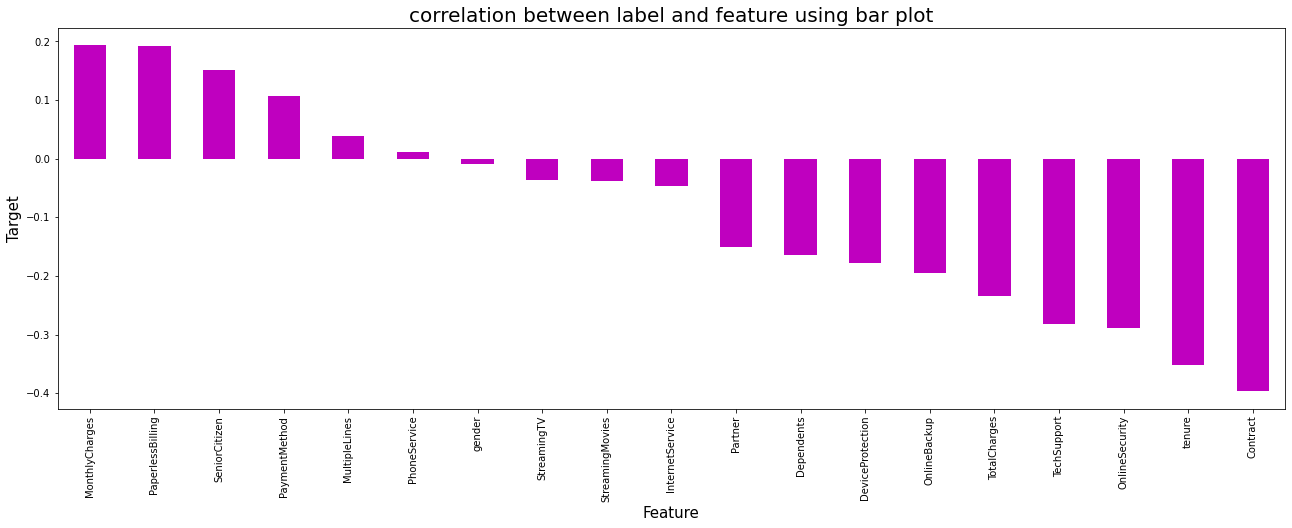

In [73]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here the features gender and PhoneService have very less correlation with the column.

## Separating the feature and label into x and y

In [74]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

In [75]:
# Dimension of x
x.shape

(7043, 19)

In [76]:
# Dimension of y
y.shape

(7043,)

## Feature Scaling using Standard Scalarization

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


We have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

In the heat map we have found some features having high correlation between each other which means multicollinearity problem so let's check the VIF value to solve multicollinearity problem.

## Checking Variance Inflation Factor(VIF)

In [78]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


By checking VIF value we can find the features which causing multicollinearity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF(above 10).

In [79]:
# Dropping TotalCharges column
x.drop("TotalCharges",axis=1,inplace=True)

In [80]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


All the columns have VIF less than 10which means the data is free from multicollinearity problem. So we can move further to build our machine learning models.

In [81]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

Here we can observe the data is not balanced, since it is classification problem we will balance the data using oversampling method.

## Oversampling

In [82]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [83]:
# Checking value count of target column
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

We have used oversampling method to balance the data and checked the value count. Since the highest count of Churn column is 5174 so the data is balanced by oversampling all the categories to the count 5174. Finally the data is also balanced then we can build our machine leaning classification models.

## Modeling
## Finding best random state

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [85]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8647342995169082  on Random_state  102


## Creating train_test split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

## Classification Algorithms

In [86]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

## Random Forest Classifier

In [89]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)


print("The Accuracy Score is:",accuracy_score(y_test, predRFC))
print("The Confusion Matrix is:\n",confusion_matrix(y_test, predRFC))
print("The Classification Report is:\n",classification_report(y_test,predRFC))

The Accuracy Score is: 0.8628019323671497
The Confusion Matrix is:
 [[1348  222]
 [ 204 1331]]
The Classification Report is:
               precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1570
         1.0       0.86      0.87      0.86      1535

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



Here we have created the Random Forest Classifier model and getting the accuracy for this model as 86.28%.

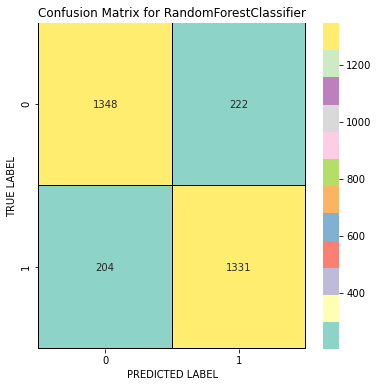

In [95]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Set3",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## Logistic Regression

In [96]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)


print("The Accuracy Score is:",accuracy_score(y_test, predLR))
print("The Confusion Matrix is:\n",confusion_matrix(y_test, predLR))
print("The Classification Report is:\n",classification_report(y_test,predLR))

The Accuracy Score is: 0.7851851851851852
The Confusion Matrix is:
 [[1165  405]
 [ 262 1273]]
The Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.74      0.78      1570
         1.0       0.76      0.83      0.79      1535

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.78      3105
weighted avg       0.79      0.79      0.78      3105



We have created Logistic Regression model which is giving the accuracy 78.51%.

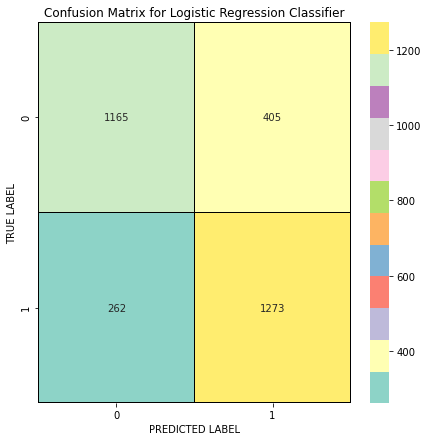

In [97]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Set3",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## Support Vector Machine Classifier

In [98]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)


print("The Accuracy Score is:",accuracy_score(y_test, predsvc))
print("The Confusion Matrix is:\n",confusion_matrix(y_test, predsvc))
print("The Classification Report is:\n",classification_report(y_test,predsvc))

The Accuracy Score is: 0.8167471819645733
The Confusion Matrix is:
 [[1203  367]
 [ 202 1333]]
The Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.77      0.81      1570
         1.0       0.78      0.87      0.82      1535

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



We created SVC model and it is giving the accuracy as 81.67%.

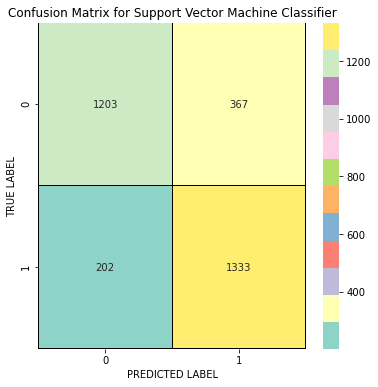

In [100]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Set3",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## Gradient Boosting Classifier

In [101]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)


print("The Accuracy Score is:",accuracy_score(y_test, predGB))
print("The Confusion Matrix is:\n",confusion_matrix(y_test, predGB))
print("The Classification Report is:\n",classification_report(y_test,predGB))

The Accuracy Score is: 0.8553945249597423
The Confusion Matrix is:
 [[1304  266]
 [ 183 1352]]
The Classification Report is:
               precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      1570
         1.0       0.84      0.88      0.86      1535

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



We have created Gradient Boosting Classifier model and the accuracy we got is 85.53%.

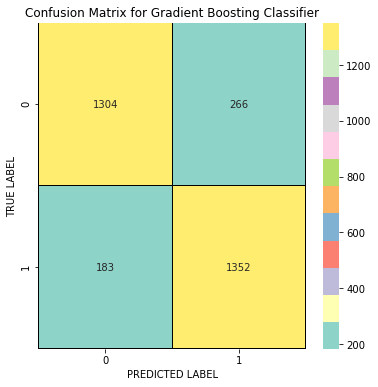

In [102]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Set3",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## AdaBoost Classifier

In [103]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)


print("The Accuracy Score is:",accuracy_score(y_test, predABC))
print("The Confusion Matrix is:\n",confusion_matrix(y_test, predABC))
print("The Classification Report is:\n",classification_report(y_test,predABC))

The Accuracy Score is: 0.8328502415458937
The Confusion Matrix is:
 [[1241  329]
 [ 190 1345]]
The Classification Report is:
               precision    recall  f1-score   support

         0.0       0.87      0.79      0.83      1570
         1.0       0.80      0.88      0.84      1535

    accuracy                           0.83      3105
   macro avg       0.84      0.83      0.83      3105
weighted avg       0.84      0.83      0.83      3105



We have created AdaBoost Classifier model and it is giving the acuracy as 83.28%.

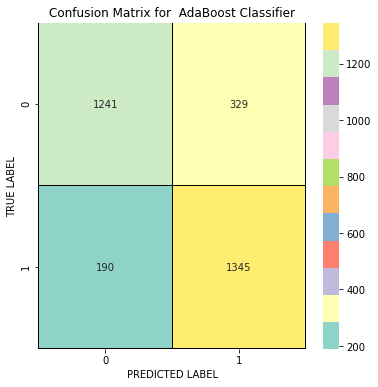

In [106]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Set3",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values

## Bagging Classifier

In [107]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)


print("The Accuracy Score is:",accuracy_score(y_test, predBC))
print("The Confusion Matrix is:\n",confusion_matrix(y_test, predBC))
print("The Classification Matrix is:\n",classification_report(y_test,predBC))

The Accuracy Score is: 0.8351046698872786
The Confusion Matrix is:
 [[1340  230]
 [ 282 1253]]
The Classification Matrix is:
               precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      1570
         1.0       0.84      0.82      0.83      1535

    accuracy                           0.84      3105
   macro avg       0.84      0.83      0.83      3105
weighted avg       0.84      0.84      0.84      3105



We have created Bagging Classifier model and getting Accuracy as 83.51%.

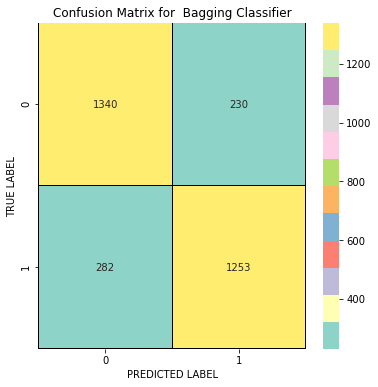

In [109]:
# Lets plot confusion matrix for  Bagging Classifier
cm = confusion_matrix(y_test,predBC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Set3",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Bagging Classifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## Extra Trees Classifier

In [111]:
# Checking accuracy for ExtraTreesClassifier
XT = ExtraTreesClassifier()
XT.fit(x_train,y_train)
predXT = XT.predict(x_test)


print("The Accuracy Score is:",accuracy_score(y_test, predXT))
print("The Confusion Matrix is:\n",confusion_matrix(y_test, predXT))
print("The Classification Report is:\n",classification_report(y_test,predXT))

The Accuracy Score is: 0.8663446054750402
The Confusion Matrix is:
 [[1351  219]
 [ 196 1339]]
The Classification Report is:
               precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1570
         1.0       0.86      0.87      0.87      1535

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



Created ExtraTrees Classifier model and getting accuracy for this model as 86.63%.

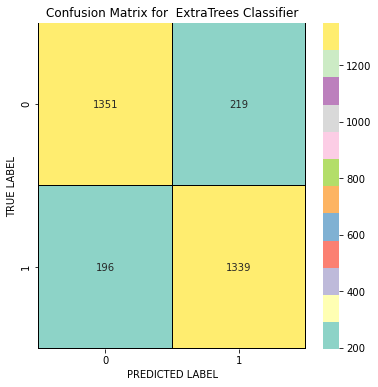

In [113]:
# Lets plot confusion matrix for  ExtraTreesClassifier
cm = confusion_matrix(y_test,predXT)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Set3",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## XGB Classifier

In [114]:
# Checking accuracy for XGBClassifier
XGB = xgb(verbosity=0)
XGB.fit(x_train,y_train)
predXGB = XGB.predict(x_test)


print("The Accuracy Score is:",accuracy_score(y_test, predXGB))
print("The Confusion Matrix is:\n",confusion_matrix(y_test, predXGB))
print("The Classification Report is:\n",classification_report(y_test,predXGB))

The Accuracy Score is: 0.8582930756843801
The Confusion Matrix is:
 [[1351  219]
 [ 221 1314]]
The Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1570
         1.0       0.86      0.86      0.86      1535

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



We have created XGB classifier model and getting the accuracy for this model as 85.82%.

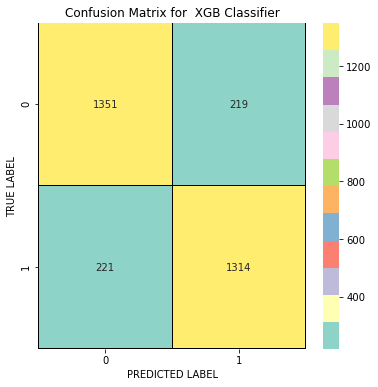

In [116]:
# Lets plot confusion matrix for  XGBClassifier
cm = confusion_matrix(y_test,predXGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Set3",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGB Classifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## Cross Validation Score

In [117]:
# cv score for Random Forest Classifier
print("The Cross Validation Score for Random Forest Classifier is:",cross_val_score(RFC,x,y,cv=5).mean())

# cv score for Logistic Regression
print("The Cross Validation Score for Logistic Regression is:",cross_val_score(LR,x,y,cv=5).mean())

# cv score for Support Vector Machine Classifier
print("The Cross Validation Score for Support Vector Machine Classifier is:",cross_val_score(svc,x,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print("The Cross Validation Score for Gradient Boosting Classifier is:",cross_val_score(GB,x,y,cv=5).mean())

# cv score for AdaBoosting Classifier
print("The Cross Validation Score for AdaBoosting Classifier is:",cross_val_score(ABC,x,y,cv=5).mean())

# cv score for Bagging Classifier
print("The Cross Validation Score for Bagging Classifier is:",cross_val_score(BC,x,y,cv=5).mean())

# cv score for Extra Trees Classifier
print("The Cross Validation Score for Extra Tress Classifier is:",cross_val_score(XT,x,y,cv=5).mean())

# cv score for XGB Classifier
print("The Cross Validation Score for XGB Classifier is:",cross_val_score(XGB,x,y,cv=5).mean())

The Cross Validation Score for Random Forest Classifier is: 0.8537007072426409
The Cross Validation Score for Logistic Regression is: 0.7717442438761286
The Cross Validation Score for Support Vector Machine Classifier is: 0.8039270762556534
The Cross Validation Score for Gradient Boosting Classifier is: 0.8342763546533483
The Cross Validation Score for AdaBoosting Classifier is: 0.8129168330286284
The Cross Validation Score for Bagging Classifier is: 0.824518367528013
The Cross Validation Score for Extra Tress Classifier is: 0.8662616540932048
The Cross Validation Score for XGB Classifier is: 0.8351518038306447


From the difference between the accuracy score and the cross validation score we can conclude that ExtraTrees Classifer as our best fitting model whch is giving very less difference compare to other models.

## Hyper Parameter Tuning

In [118]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [119]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [120]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [121]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 50}

In [123]:
FinalModel = ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=50, n_jobs=-2, random_state=50)
FinalModel.fit(x_train, y_train)
pred = FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print("The Accuracy Score is:",acc*100)

The Accuracy Score is: 86.82769726247987


#### The accuracy of best model increased after tuning and giving 86.82% which is very good.

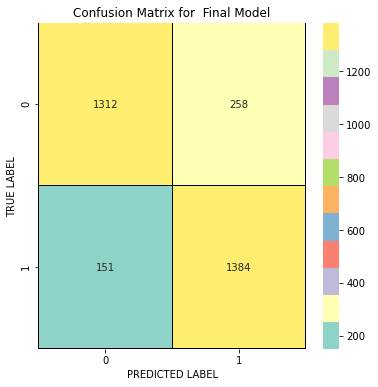

In [124]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Set3",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

With the help of confusion matrix we can able to see actual and predicted values.

## Plotting ROC and compare AUC for all the models used

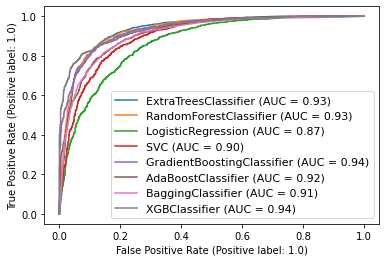

In [125]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(XT,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Here we can see the Area under curve for each model used here.

## Plotting ROC and Compare AUC for the best model

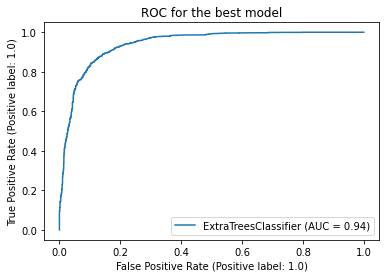

In [126]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(FinalModel, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 94%.

## Saving The Model

In [127]:
# Saving the model using .pkl
import joblib
joblib.dump(FinalModel,"Customer_Churn_Analysis.pkl")

['Customer_Churn_Analysis.pkl']

## Predicting the saved model

In [129]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Customer_Churn_Analysis.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1., 0., 0., ..., 1., 1., 0.])

These are the predicted churned values of the customers.

In [130]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3100,1.0,1.0
3101,1.0,0.0
3102,1.0,1.0
3103,1.0,1.0


Both actual and predicted values are almost same.